In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [6]:
#suport vector machine(SVM)
#분류모델 : 데이텉가 사상된 공간에서 경계
# SVM 알고리즘 = 그 중 가장 큰 폭을 가진 경계를 찾는 알고리즘
# 단순한 초평면 보다 복잡한 모델 위해 확장
# 샘플에 가운데 선의 거리가 최대화(마진이 최대화 되는 벡터)
# 비선형일 때는 특징을 추가하여 3차원으로 투영한다.(커널 트릭)

Text(0, 0.5, '특성 1')

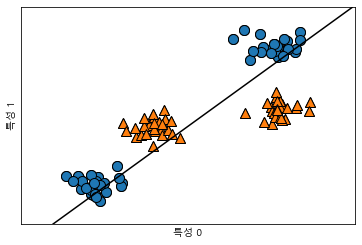

In [7]:
#linear svc

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
X,y = make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)

linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")



In [8]:
#분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어 이런 데이터셋에는
#잘 들어맞지 않아 보인다.

Text(0.5, 0, '특성 1**2')

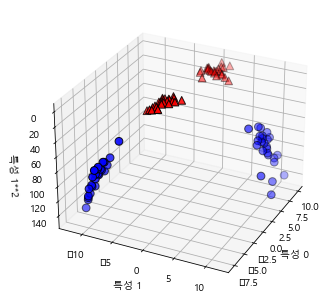

In [9]:
#이번에는 두 번째 특성을 제곱하여 추가한다
X_new = np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#3차원 그래프
ax= Axes3D(figure,elev=-152,azim=-26)
mask = y==0
#y=0인 포인트를 먼저 그리고 그다음 y==1인 포인트를 그린다.
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")


In [10]:
#이후 선형 경계를 그려 보겠습니다.

Text(0.5, 0, '특성 1**2')

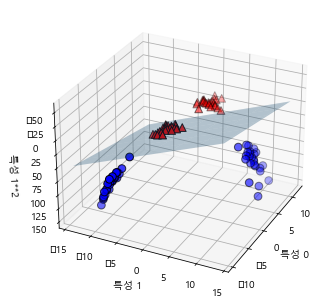

In [15]:
linear_svm_3d=LinearSVC(max_iter=5000).fit(X_new,y)
coef,intercept= linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

#선형 결정 경계 그리기
figure=plt.figure()
ax= Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ =(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")


In [ ]:
#원래 특성으로 투영해보면 이 선형 모델은 더 이상 선형이 아닌 직선보다 타원에 가까운 모습을 보인다

Text(0, 0.5, '특성 1')

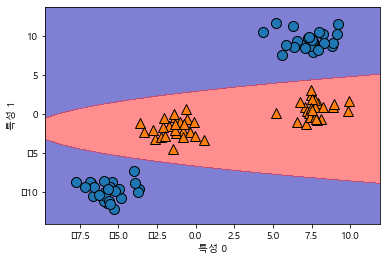

In [17]:
ZZ =YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

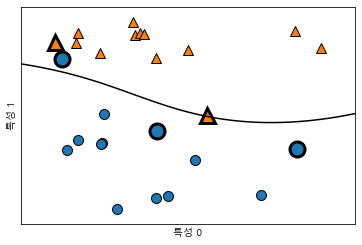

In [26]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,random_state=0)

X,y= mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
#데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#서포트 벡터
sv = svm.support_vectors_
#dual_coef_의 부호에 의해 서포트 벡텅의 클래스 레이블이 결정된다.
sv_labels =svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)

plt.xlabel("특성 0")
plt.ylabel("특성 1")



In [27]:
# svm은 비선형 경계를 만들었네요. C와 감마 를 좀더 자세히 보겠습니다

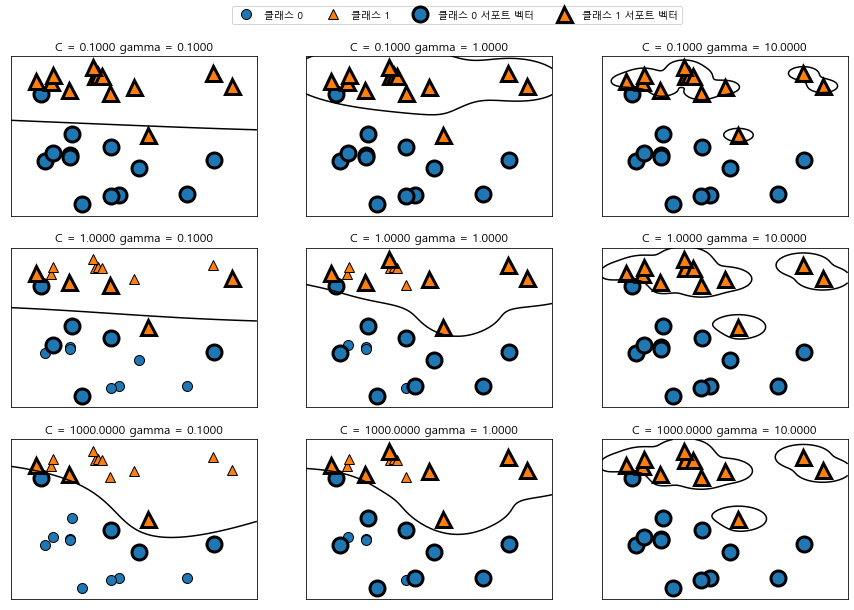

In [28]:
fig,axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes,[-1,0,3]):
    for a , gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
        
axes[0,0].legend(["클래스 0","클래스 1","클래스 0 서포트 벡터","클래스 1 서포트 벡터"]
                ,ncol=4,loc=(.9,1.2))

In [29]:
#감마를 증가시킬수록 가우시안 커널의 반경을 크게 하여 만흔 포인트들이 가까이 있는 것이 되네요
#작은 감마의 값이 모델의 복잡도를 낮추고 큰 감마는 더 복잡한 모델을 만듭니다
#C를 증가 시키면 모델에 결정 경계가 휘어서 정확하게 분류하게 되네요!

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,random_state=0)

svc =SVC()
svc.fit(X_train,y_train)

print("훈련 세트 점수: {: .2f}".format(svc.score(X_train,y_train)))
print("테스트 세트 점수: {: .2f}".format(svc.score(X_test,y_test)))

훈련 세트 점수:  0.90
테스트 세트 점수:  0.94


In [ ]:
#저는 왜 테스트 점수가 이리 잘 나올까요.. 원래는 63퍼가 나와야 하는데..

Text(0, 0.5, '특성 크기')

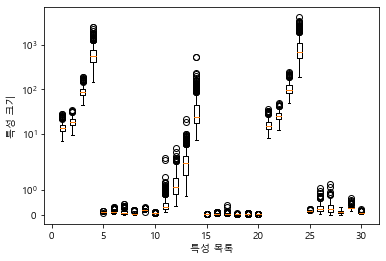

In [34]:
plt.boxplot(X_train,manage_ticks=False)
#이거 책에서  manage_xticks라 나왓는데 manage_ticks 라 해야 하네요
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [ ]:
#그래프를 보면 유방암 데이터 셋의 특성은 자리숫 자체가 완전히 다릅니다.
#특성 값의 범위가 너무 관대해지면 비슷해지도록 조정해야 합니다.
#즉 데이터 전처리가 필요한 거죠

In [ ]:
#데이터 전처리 수작업

In [35]:
min_on_training = X_train.min(axis=0)
#훈련 세트에서 특성별 최솟값 계산
range_on_training =(X_train-min_on_training).max(axis=0)
#훈련 세트에서 특성별(최댓갑-최솟값) 범위 계산

#훈련데이터에 최솟값을 빼고 범위로 나무면
# 각 특성에 대해 최솟값은 0 최댓값은 1이 나온다

X_train_scaled =(X_train-min_on_training)/range_on_training
print("특성별 최솟값\n",X_train_scaled.min(axis=0))
print("특성별 최댓값\n",X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [42]:
X_test_scaled =(X_test-min_on_training)/range_on_training

svc =SVC()
svc.fit(X_train_scaled,y_train)

print("훈련 세트 점수: {: .3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 점수: {: .3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 점수:  0.984
테스트 세트 점수:  0.972


In [ ]:
#오 확실히 성능이 더 좋아졌습니다!

In [48]:
svc= SVC(C=1000)
svc.fit(X_train_scaled,y_train)

print("훈련 세트 점수: {: .3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 점수: {: .3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 점수:  1.000
테스트 세트 점수:  0.958


In [ ]:
#원래 c값을 높이면 모델의 성능이 더 좋아집니다!